In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib as p
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c human-protein-atlas-image-classification

100% 17.5G/17.5G [03:32<00:00, 54.7MB/s]
100% 17.5G/17.5G [03:32<00:00, 88.1MB/s]


In [ ]:
!unzip human-protein-atlas-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/f5b629aa-bbbb-11e8-b2ba-ac1f6b6435d0_blue.png  
  inflating: train/f5b629aa-bbbb-11e8-b2ba-ac1f6b6435d0_green.png  
  inflating: train/f5b629aa-bbbb-11e8-b2ba-ac1f6b6435d0_red.png  
  inflating: train/f5b629aa-bbbb-11e8-b2ba-ac1f6b6435d0_yellow.png  
  inflating: train/f5b6f5c0-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png  
  inflating: train/f5b6f5c0-bbc4-11e8-b2bc-ac1f6b6435d0_green.png  
  inflating: train/f5b6f5c0-bbc4-11e8-b2bc-ac1f6b6435d0_red.png  
  inflating: train/f5b6f5c0-bbc4-11e8-b2bc-ac1f6b6435d0_yellow.png  
  inflating: train/f5baae8e-bbc1-11e8-b2bb-ac1f6b6435d0_blue.png  
  inflating: train/f5baae8e-bbc1-11e8-b2bb-ac1f6b6435d0_green.png  
  inflating: train/f5baae8e-bbc1-11e8-b2bb-ac1f6b6435d0_red.png  
  inflating: train/f5baae8e-bbc1-11e8-b2bb-ac1f6b6435d0_yellow.png  
  inflating: train/f5c09c38-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png  
  inflating: train/f5c09c38-bbc4-11e8-b2bc-ac1f6b6435d0_green.png  
  in

In [ ]:
dataset_folder = os.path.join("train")
datasetObject = p.Path(dataset_folder)
dataset_images = list(datasetObject.glob("*.*"))

In [ ]:
dataset_images[0]

PosixPath('train/fbef47b6-bbac-11e8-b2ba-ac1f6b6435d0_red.png')

In [ ]:
len(dataset_images)

124288

In [ ]:
train_dataset = pd.read_csv("train.csv")
train_dataset.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [ ]:
len(train_dataset)

31072

In [ ]:
target = train_dataset['Target']
target.head()

0       16 0
1    7 1 2 0
2          5
3          1
4         18
Name: Target, dtype: object

In [ ]:
# test_path = "../input/test/"
# submission = pd.read_csv("../input/sample_submission.csv")
# submission.head()
# test_names = submission.Id.values
# print(len(test_names))
# print(test_names[0])

In [ ]:
test_dataset = pd.read_csv("/content/sample_submission.csv")
test_dataset.head()

Id  Predicted
0  00008af0-bad0-11e8-b2b8-ac1f6b6435d0          0
1  0000a892-bacf-11e8-b2b8-ac1f6b6435d0          0
2  0006faa6-bac7-11e8-b2b7-ac1f6b6435d0          0
3  0008baca-bad7-11e8-b2b9-ac1f6b6435d0          0
4  000cce7e-bad4-11e8-b2b8-ac1f6b6435d0          0

In [ ]:
test_names = test_dataset.Id.values
print(len(test_names))
print(test_names[0])

11702
00008af0-bad0-11e8-b2b8-ac1f6b6435d0


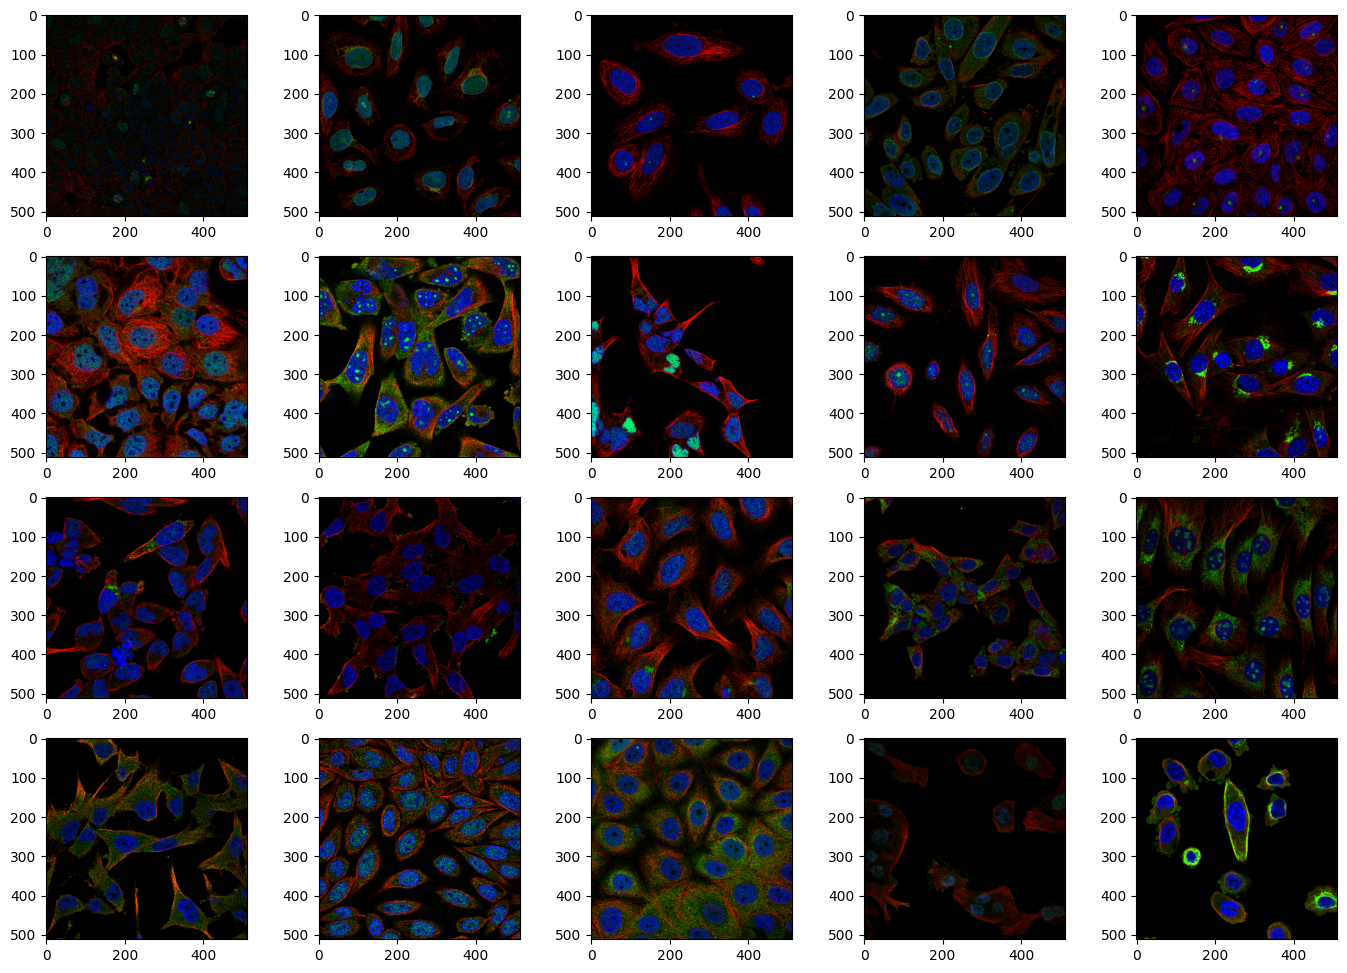

In [ ]:
IDs = train_dataset['Id']
plt.figure(figsize = (17, 12))
for i in range(20):
  plt.subplot(4, 5, i + 1)
  red= cv2.imread("train/{}_red.png".format(str(IDs[i])), 0)
  green = cv2.imread("train/{}_green.png".format(str(IDs[i])), 0)
  blue = cv2.imread("train/{}_blue.png".format(str(IDs[i])), 0)
  image = np.stack((red, green, blue), -1)
  plt.imshow(image)
plt.show()

In [ ]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

In [ ]:
def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [ ]:
for key in label_names.keys():
    train_dataset[label_names[key]] = 0

In [ ]:
train_dataset = train_dataset.apply(fill_targets, axis=1)
train_dataset.head()

<ipython-input-20-90a1d68efcaf>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row.Target = np.array(row.Target.split(" ")).astype(np.int)


Id        Target  Nucleoplasm  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       [16, 0]            1   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]            1   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0           [5]            0   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0           [1]            0   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0          [18]            0   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 1         1                          0                 0   
2                 0         0                          0                 0   
3                 1         0                          0                 0   
4                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  Golgi apparatus  ...  \
0               0                      0                0  ...   
1               0                      0                1  ...   
2               1                      0                0  ...   
3               0                      0                0  ...   
4               0                      0                0  ...   

   Microtubule organizing center  Centrosome  Lipid droplets  Plasma membrane  \
0                              0           0               0                0   
1                              0           0               0                0   
2                              0           0               0                0   
3                              0           0               0                0   
4                              1           0               0                0   

   Cell junctions  Mitochondria  Aggresome  Cytosol  Cytoplasmic bodies  \
0               0             0          0        0                   0   
1               0             0          0        0                   0   
2               0             0          0        0                   0   
3               0             0          0        0                   0   
4               0             0          0        0                   0   

   Rods & rings  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 30 columns]

Text(0, 0.5, '% of train data')

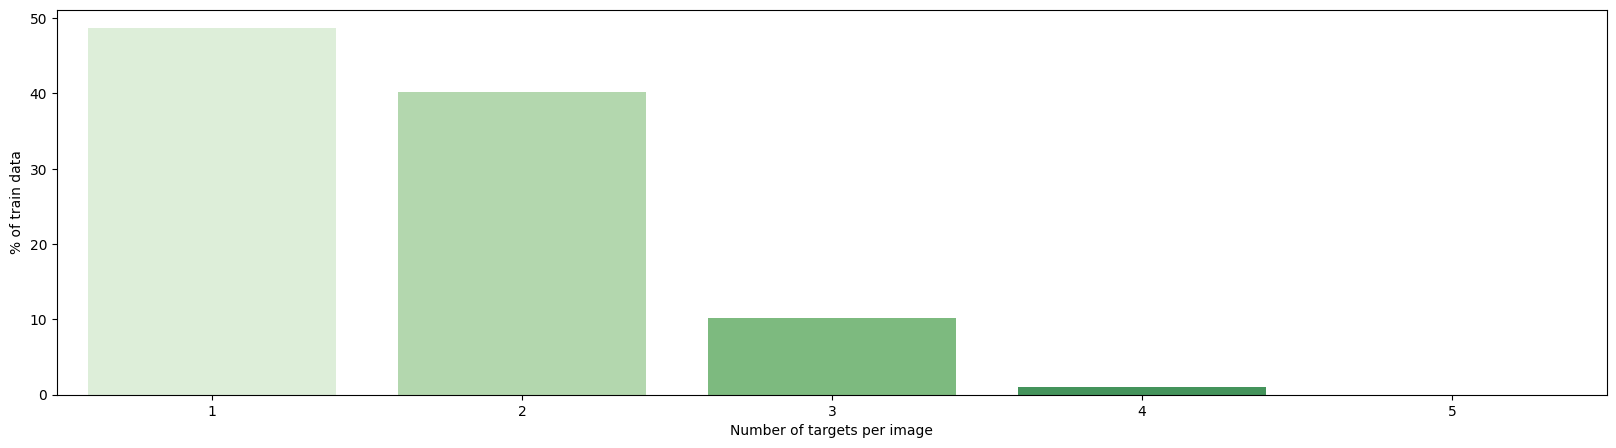

In [ ]:
train_dataset["number_of_targets"] = train_dataset.drop(["Id", "Target"],axis=1).sum(axis=1) #horizontally
count_perc = np.round(100 * train_dataset["number_of_targets"].value_counts() / train_dataset.shape[0], 2)
plt.figure(figsize=(20,5))
sns.barplot(x=count_perc.index.values, y=count_perc.values, palette="Greens")
plt.xlabel("Number of targets per image")
plt.ylabel("% of train data")

<Axes: >

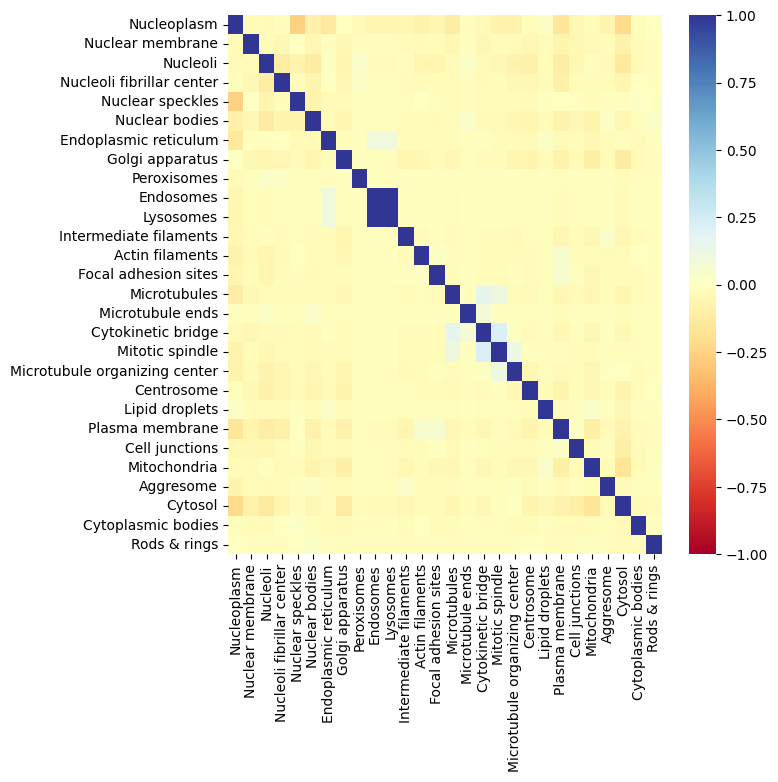

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(train_dataset[train_dataset.number_of_targets>1].drop(
    ["Id", "Target", "number_of_targets"],axis=1
).corr(), cmap="RdYlBu", vmin=-1, vmax=1)

In [ ]:
def find_counts(special_target, labels):
    counts = labels[labels[special_target] == 1].drop(
        ["Id", "Target", "number_of_targets"],axis=1
    ).sum(axis=0)
    counts = counts[counts > 0]
    counts = counts.sort_values()
    return counts

Text(0, 0.5, 'Counts in train data')

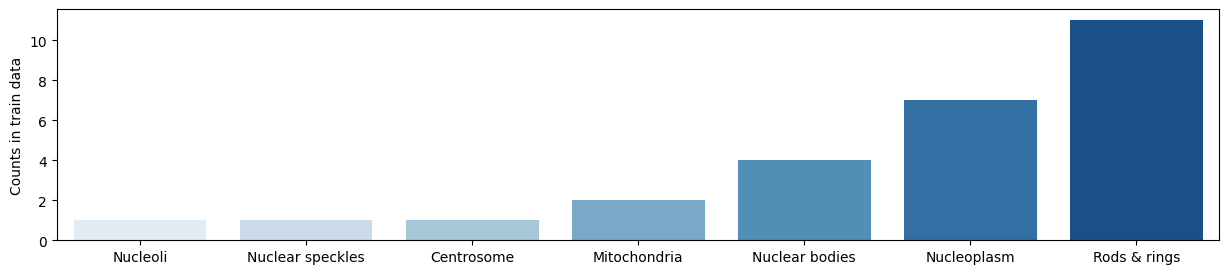

In [ ]:
rod_rings_counts = find_counts("Rods & rings", train_dataset)
plt.figure(figsize=(15,3))
sns.barplot(x=rod_rings_counts.index.values, y=rod_rings_counts.values, palette="Blues")
plt.ylabel("Counts in train data")

In [ ]:
train_path = "/content/train"
def load_image(basepath, image_id):
    images = np.zeros(shape=(4,512,512))
    images[0,:,:] = cv2.imread(basepath + image_id + "_green" + ".png")
    images[1,:,:] = cv2.imread(basepath + image_id + "_red" + ".png")
    images[2,:,:] = cv2.imread(basepath + image_id + "_blue" + ".png")
    images[3,:,:] = cv2.imread(basepath + image_id + "_yellow" + ".png")
    return images


In [ ]:
INPUT_SHAPE = (299,299,3)
BATCH_SIZE = 10

In [ ]:
path_to_train = '/content/train'
data = pd.read_csv('/content/train.csv')

train_dataset_info = []
for name, labels in zip(data['Id'], data['Target'].str.split(' ')):
    train_dataset_info.append({
        'path':os.path.join(path_to_train, name),
        'labels':np.array([int(label) for label in labels])})
train_dataset_info = np.array(train_dataset_info)

In [ ]:
train_dataset_info

array([{'path': '/content/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0', 'labels': array([16,  0])},
       {'path': '/content/train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0', 'labels': array([7, 1, 2, 0])},
       {'path': '/content/train/000a9596-bbc4-11e8-b2bc-ac1f6b6435d0', 'labels': array([5])},
       ...,
       {'path': '/content/train/fff189d8-bbab-11e8-b2ba-ac1f6b6435d0', 'labels': array([7])},
       {'path': '/content/train/fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0', 'labels': array([25,  2, 21])},
       {'path': '/content/train/fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0', 'labels': array([2, 0])}],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
train_ids, test_ids, train_targets, test_target = train_test_split(
    data['Id'], data['Target'], test_size=0.2, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
from imgaug import augmenters as iaa

In [ ]:
class data_generator:
    
    def create_train(dataset_info, batch_size, shape, augument=True):
        assert shape[2] == 3
        while True:
            random_indexes = np.random.choice(len(dataset_info), batch_size)
            batch_images = np.empty((batch_size, shape[0], shape[1], shape[2]))
            batch_labels = np.zeros((batch_size, 28)) # Creating label tensors for each batch where all 28 values are originally zero
            for i, idx in enumerate(random_indexes):
                image = data_generator.load_image(
                    dataset_info[idx]['path'], shape)   
                if augument:
                    image = data_generator.augment(image)
                batch_images[i] = image
                batch_labels[i][dataset_info[idx]['labels']] = 1 
            yield batch_images, batch_labels
            
    def load_image(path, shape):
        R = np.array(Image.open(path+'_red.png'))
        G = np.array(Image.open(path+'_green.png'))
        B = np.array(Image.open(path+'_blue.png'))
        Y = np.array(Image.open(path+'_yellow.png'))

        image = np.stack((
            R/2 + Y/2, 
            G/2 + Y/2, 
            B),-1)
        
        image = cv2.resize(image, (shape[0], shape[1])) # resizing the image
        image = np.divide(image, 255) # Normalising the image
        return image  
                
    # Random augmentation based modification. This means each image appended to our set is rotated or flipped by some degree if augmentation is set to True which it is.
    def augment(image):
        augment_img = iaa.Sequential([
            iaa.OneOf([
                iaa.Affine(rotate=0),
                iaa.Affine(rotate=90),
                iaa.Affine(rotate=180),
                iaa.Affine(rotate=270),
                iaa.Fliplr(0.5),
                iaa.Flipud(0.5),
            ])], random_order=True)
        
        image_aug = augment_img.augment_image(image)
        return image_aug

In [ ]:
train_datagen = data_generator.create_train(train_dataset_info, 5, (299,299,3), augument=True)

min: 0.0, max: 1.0


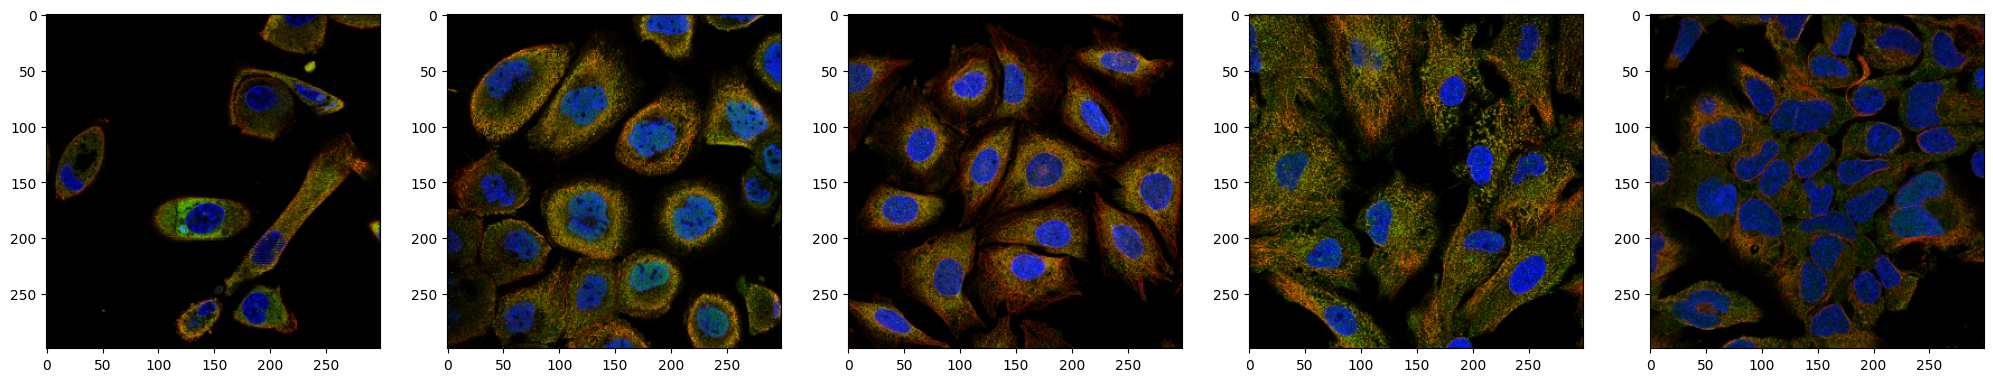

In [ ]:
images, labels = next(train_datagen)

fig, ax = plt.subplots(1,5,figsize=(25,5))
for i in range(5):
    ax[i].imshow(images[i])
print('min: {0}, max: {1}'.format(images.min(), images.max()))

#Model 1 (InceptionResnetV2)

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing import image
from keras.models import Sequential, load_model
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.models import Model
from keras.applications import InceptionResNetV2
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras.callbacks import Callback
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
import tensorflow as tf
import keras

def create_model(input_shape, n_out):
    
    pretrain_model = InceptionResNetV2(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape)    
    
    input_tensor = Input(shape=input_shape)
    bn = BatchNormalization()(input_tensor)
    x = pretrain_model(bn)
    x = Conv2D(128, kernel_size=(1,1), activation='relu')(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(n_out, activation='sigmoid')(x)
    model = Model(input_tensor, output)
    
    return model

In [ ]:
def f1(y_true, y_pred):
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [ ]:

def show_history(history):
    fig, ax = plt.subplots(1, 3, figsize=(15,3))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('f1')
    ax[1].plot(history.epoch, history.history["f1"], label="Train f1")
    ax[1].plot(history.epoch, history.history["val_f1"], label="Validation f1")
    ax[2].set_title('acc')
    ax[2].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[2].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()

In [ ]:
keras.backend.clear_session()

model = create_model(
    input_shape=(299,299,3), 
    n_out=28)

model.summary()

219055592/219055592 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 batch_normalization_203 (Ba  (None, 299, 299, 3)      12        
 tchNormalization)                                               
                                                                 
 inception_resnet_v2 (Functi  (None, 8, 8, 1536)       54336736  
 onal)                                                           
                                                                 
 conv2d_203 (Conv2D)         (None, 8, 8, 128)         196736    
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                            

In [ ]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# Image.open('model_plot.png')

In [ ]:
train_generator = data_generator.create_train(train_dataset_info[train_ids.index], BATCH_SIZE, INPUT_SHAPE, augument=False)
validation_generator = data_generator.create_train(train_dataset_info[test_ids.index], 10, INPUT_SHAPE, augument=False)

In [ ]:
train_generator

<generator object data_generator.create_train at 0x7f6b760d0510>

In [ ]:
from keras.preprocessing import image

In [ ]:
# # checkpointer = ModelCheckpoint('/kaggle/working/InceptionResNetV2.model',verbose=2, save_best_only=True)

# train_generator = data_generator.create_train(
#     train_dataset_info[train_ids.index], BATCH_SIZE, INPUT_SHAPE, augument=False)
# validation_generator = data_generator.create_train(
#     train_dataset_info[test_ids.index], 256, INPUT_SHAPE, augument=False)

# model.layers[2].trainable = False

model.compile(
    loss='binary_crossentropy',  
    optimizer=Adam(1e-4),
    metrics=['acc', f1])

history = model.fit(
    (train_generator),
    steps_per_epoch=10,
    validation_data=next(validation_generator),
    epochs=40, 
    verbose=1)

Epoch 1/40
10/10 [==============================] - 267s 24s/step - loss: 0.5266 - acc: 0.1000 - f1: 0.0648 - val_loss: 0.2688 - val_acc: 0.1000 - val_f1: 0.0349
Epoch 2/40
10/10 [==============================] - 247s 25s/step - loss: 0.2736 - acc: 0.1200 - f1: 0.0509 - val_loss: 0.3043 - val_acc: 0.2000 - val_f1: 0.0175
Epoch 3/40
10/10 [==============================] - 224s 23s/step - loss: 0.2403 - acc: 0.1500 - f1: 0.0381 - val_loss: 0.3213 - val_acc: 0.2000 - val_f1: 0.0172
Epoch 4/40
10/10 [==============================] - 223s 22s/step - loss: 0.2250 - acc: 0.2500 - f1: 0.0450 - val_loss: 0.2735 - val_acc: 0.2000 - val_f1: 0.0225
Epoch 5/40
10/10 [==============================] - 229s 23s/step - loss: 0.2128 - acc: 0.3200 - f1: 0.0477 - val_loss: 0.2497 - val_acc: 0.2000 - val_f1: 0.0272
Epoch 6/40
10/10 [==============================] - 224s 22s/step - loss: 0.2162 - acc: 0.2500 - f1: 0.0474 - val_loss: 0.2370 - val_acc: 0.2000 - val_f1: 0.0275
Epoch 7/40
10/10 [==========

In [ ]:
results = model.evaluate(test_data_batches, batch_size=42)
print("test loss, test acc:", results)

#VGG16

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
_input = Input((299,299,3)) 

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing import image
from keras.models import Sequential, load_model
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.models import Model
from keras.applications import InceptionResNetV2
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras.callbacks import Callback
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

def create_model_vgg16(input_shape, n_out):
    
    conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
    conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
    pool1  = MaxPooling2D((2, 2))(conv2)
    
    conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
    conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
    pool2  = MaxPooling2D((2, 2))(conv4)

    conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
    conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
    conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
    pool3  = MaxPooling2D((2, 2))(conv7)

    conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
    conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
    conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
    pool4  = MaxPooling2D((2, 2))(conv10)

    conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
    conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
    conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
    pool5  = MaxPooling2D((2, 2))(conv13)

    flat   = Flatten()(pool5)
    dense1 = Dense(512, activation="relu")(flat)
    dense2 = Dense(512, activation="relu")(dense1)
    output = Dense(28, activation="softmax")(dense2)

    vgg16_model  = Model(inputs=_input, outputs=output)

    return vgg16_model

In [ ]:
def f1(y_true, y_pred):
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [ ]:

def show_history(history):
    fig, ax = plt.subplots(1, 3, figsize=(15,3))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('f1')
    ax[1].plot(history.epoch, history.history["f1"], label="Train f1")
    ax[1].plot(history.epoch, history.history["val_f1"], label="Validation f1")
    ax[2].set_title('acc')
    ax[2].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[2].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()

In [ ]:
keras.backend.clear_session()

model2 = create_model_vgg16(
    input_shape=(299,299,3), 
    n_out=28)

model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 299, 299, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 149, 149, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 149, 149, 128)     147584    
                                                             

In [ ]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# Image.open('model_plot.png')

In [ ]:
train_generator = data_generator.create_train(train_dataset_info[train_ids.index], 5, INPUT_SHAPE, augument=False)
validation_generator = data_generator.create_train(train_dataset_info[test_ids.index], 5, INPUT_SHAPE, augument=False)

In [ ]:
train_generator

<generator object data_generator.create_train at 0x7f73b3bf8190>

In [ ]:
from keras.preprocessing import image

In [ ]:

model2.compile(
    loss='binary_crossentropy',  
    optimizer=Adam(1e-4),
    metrics=['acc', f1])

history = model2.fit(
    (train_generator),
    steps_per_epoch=10,
    validation_data=next(validation_generator),
    epochs=30, 
    verbose=1)

Epoch 1/30
10/10 [==============================] - 214s 21s/step - loss: 0.5450 - acc: 0.1400 - f1: 0.0152 - val_loss: 0.5570 - val_acc: 0.2000 - val_f1: 0.0119
Epoch 2/30
10/10 [==============================] - 207s 21s/step - loss: 0.3030 - acc: 0.0800 - f1: 0.0187 - val_loss: 0.2249 - val_acc: 0.2000 - val_f1: 0.0199
Epoch 3/30
10/10 [==============================] - 210s 21s/step - loss: 0.2452 - acc: 0.1600 - f1: 0.0242 - val_loss: 0.1942 - val_acc: 0.2000 - val_f1: 0.0229
Epoch 4/30
10/10 [==============================] - 206s 21s/step - loss: 0.1993 - acc: 0.3600 - f1: 0.0246 - val_loss: 0.1854 - val_acc: 0.0000e+00 - val_f1: 0.0203
Epoch 5/30
10/10 [==============================] - 212s 21s/step - loss: 0.2015 - acc: 0.3200 - f1: 0.0255 - val_loss: 0.1799 - val_acc: 0.2000 - val_f1: 0.0216
Epoch 6/30
10/10 [==============================] - 205s 21s/step - loss: 0.1866 - acc: 0.4000 - f1: 0.0280 - val_loss: 0.1825 - val_acc: 0.2000 - val_f1: 0.0224
Epoch 7/30
10/10 [======

In [ ]:
model_name="CNN1"
model.save('D:\E\Mtech DAIICT\Sem2\Advance ML (IT585)\Project'+model_name)

In [ ]:
show_history(history)

#ResNet Model

In [ ]:
df = pd.read_csv('human-protein-atlas-image-classification/train.csv')

In [ ]:
INPUT_SHAPE = (512, 512, 3)
BATCH_SIZE = 16

In [ ]:
 path_to_train = 'human-protein-atlas-image-classification/train/'

In [ ]:
df["complete_path"] = path_to_train + df["Id"]

In [ ]:
df.head()

Id   Target  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   

                                       complete_path  
0  /kaggle/input/human-protein-atlas-image-classi...  
1  /kaggle/input/human-protein-atlas-image-classi...  
2  /kaggle/input/human-protein-atlas-image-classi...  
3  /kaggle/input/human-protein-atlas-image-classi...  
4  /kaggle/input/human-protein-atlas-image-classi...

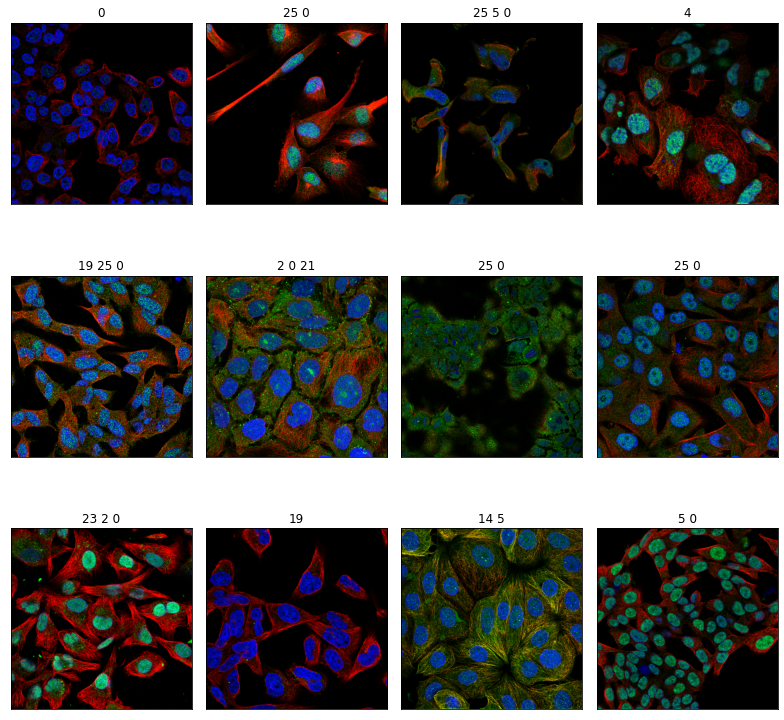

In [ ]:
import random
fig, axes = plt.subplots(3, 4, figsize=(11, 11))
for i in range(3):
    for j in range(4):
        idx = random.randint(0, df.shape[0])
        row = df.iloc[idx,:]
        path = row.complete_path
        red = np.array(Image.open(path + '_red.png'))
        green = np.array(Image.open(path + '_green.png'))
        blue = np.array(Image.open(path + '_blue.png'))
        im = np.stack((
                red,
                green,
                blue),-1)
        axes[i][j].imshow(im)
        axes[i][j].set_title(row.Target)
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
fig.tight_layout()
fig.show();

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)


train, val = train_test_split(train, test_size=0.2, random_state=42)

In [ ]:
print(f'Shape of train: {train.shape}')
print(f'Shape of test: {test.shape}')
print(f'Shape of val: {val.shape}')

Shape of train: (19885, 3)
Shape of test: (6215, 3)
Shape of val: (4972, 3)


In [ ]:
def get_clean_data(df):
    targets = []
    paths = []
    for _, row in df.iterrows():
        target_np = np.zeros((28))
        t = [int(t) for t in row.Target.split()]
        target_np[t] = 1
        targets.append(target_np)
        paths.append(row.complete_path)
    return np.array(paths), np.array(targets)

In [ ]:
train_path, train_target = get_clean_data(train)
val_path, val_target = get_clean_data(val)
test_path, test_target = get_clean_data(test)

In [ ]:
print(f'Train path shape: {train_path.shape}')
print(f'Train target shape: {train_target.shape}')
print(f'Val path shape: {val_path.shape}')
print(f'Val target shape: {val_target.shape}')
print(f'Test path shape: {test_path.shape}')
print(f'Test target shape: {test_target.shape}')

Train path shape: (19885,)
Train target shape: (19885, 28)
Val path shape: (4972,)
Val target shape: (4972, 28)
Test path shape: (6215,)
Test target shape: (6215, 28)


In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((train_path, train_target))
val_data = tf.data.Dataset.from_tensor_slices((val_path, val_target))
test_data = tf.data.Dataset.from_tensor_slices((test_path, test_target))

In [ ]:
def load_data(path, target):
    red = tf.squeeze(tf.image.decode_png(tf.io.read_file(path+'_red.png'), channels=1), [2])
    blue = tf.squeeze(tf.image.decode_png(tf.io.read_file(path+'_blue.png'), channels=1), [2])
    green = tf.squeeze(tf.image.decode_png(tf.io.read_file(path+'_green.png'), channels=1), [2])
    img = tf.stack((
                red,
                green,
                blue), axis=2)
    return img, target

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data = train_data.map(load_data, num_parallel_calls=AUTOTUNE)
val_data = val_data.map(load_data, num_parallel_calls=AUTOTUNE)
test_data = test_data.map(load_data, num_parallel_calls=AUTOTUNE)

In [ ]:
def image_augment(img, target):
    img = tf.image.random_contrast(img, lower=0.3, upper=1.2)
    img = tf.image.random_flip_up_down(img)
    img = tf.image.random_brightness(img, max_delta=0.5)
    return img, target
    
train_data = train_data.map(image_augment, num_parallel_calls=AUTOTUNE)

In [ ]:
train_data_batches = train_data.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
val_data_batches = val_data.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
test_data_batches = test_data.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

In [ ]:
resnet_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet')

resnet_model.trainable = True

input_layer = Input(shape=INPUT_SHAPE)
x = resnet_model(input_layer)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(28, activation='sigmoid')(x)
model = Model(input_layer, output)

model.summary()

94674944/94668760 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, None, None, 2048)  23564800  
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dropout (Dropout)            (None, 524288)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               268435968 
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
______________________________________________________________

#Implementation of ResNet with accuracy metrics

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_batches, steps_per_epoch = 100, validation_data = val_data_batches, epochs=15)

Epoch 1/15
100/100 [==============================] - 99s 937ms/step - loss: 0.6022 - accuracy: 0.1234 - val_loss: 2.4607 - val_accuracy: 0.4000
Epoch 2/15
100/100 [==============================] - 91s 919ms/step - loss: 0.2098 - accuracy: 0.3075 - val_loss: 0.1854 - val_accuracy: 0.2084
Epoch 3/15
100/100 [==============================] - 92s 925ms/step - loss: 0.2033 - accuracy: 0.2987 - val_loss: 0.2419 - val_accuracy: 0.3029
Epoch 4/15
100/100 [==============================] - 92s 923ms/step - loss: 0.2018 - accuracy: 0.2229 - val_loss: 0.1840 - val_accuracy: 0.4179
Epoch 5/15
100/100 [==============================] - 92s 924ms/step - loss: 0.2039 - accuracy: 0.3565 - val_loss: 0.2594 - val_accuracy: 0.4204
Epoch 6/15
100/100 [==============================] - 90s 908ms/step - loss: 0.1886 - accuracy: 0.3812 - val_loss: 0.2415 - val_accuracy: 0.4157
Epoch 7/15
100/100 [==============================] - 90s 907ms/step - loss: 0.1992 - accuracy: 0.3049 - val_loss: 0.3221 - val_ac

In [ ]:
results = model.evaluate(test_data_batches, batch_size=42)
print("test loss, test acc:", results)

1554/1554 [==============================] - 156s 100ms/step - loss: 0.1840 - accuracy: 0.4182
test loss, test acc: [0.18404127657413483, 0.41818180680274963]


#ResNet with AUC 

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

In [ ]:
history = model.fit(train_data_batches, steps_per_epoch = 100, validation_data = val_data_batches, epochs=30)

Epoch 1/30
100/100 [==============================] - 130s 1s/step - loss: 0.6299 - auc: 0.6232 - val_loss: 0.4723 - val_auc: 0.6805
Epoch 2/30
100/100 [==============================] - 94s 949ms/step - loss: 0.2279 - auc: 0.7495 - val_loss: 0.1926 - val_auc: 0.7923
Epoch 3/30
100/100 [==============================] - 94s 943ms/step - loss: 0.2084 - auc: 0.7690 - val_loss: 0.5596 - val_auc: 0.7000
Epoch 4/30
100/100 [==============================] - 94s 943ms/step - loss: 0.2045 - auc: 0.7770 - val_loss: 0.6138 - val_auc: 0.6642
Epoch 5/30
100/100 [==============================] - 94s 948ms/step - loss: 0.2127 - auc: 0.7699 - val_loss: 0.6161 - val_auc: 0.7091
Epoch 6/30
100/100 [==============================] - 94s 943ms/step - loss: 0.1937 - auc: 0.7892 - val_loss: 0.2750 - val_auc: 0.7608
Epoch 7/30
100/100 [==============================] - 93s 942ms/step - loss: 0.1941 - auc: 0.7889 - val_loss: 0.3033 - val_auc: 0.7416
Epoch 8/30
100/100 [==============================] - 94s

In [ ]:
results = model.evaluate(test_data_batches, batch_size=42)
print("test loss, test acc:", results)

1554/1554 [==============================] - 131s 84ms/step - loss: 0.1744 - auc: 0.8350
test loss, test acc: [0.1743607372045517, 0.8349796533584595]


#Final Model

In [ ]:
import sys
import numpy as np
import keras
from keras.utils import Sequence
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm
import os
import imgaug as ia
from imgaug import augmenters as iaa
import cv2

Using TensorFlow backend.


In [ ]:
BATCH_SIZE = 128
SEED = 777
SHAPE = (192, 192, 4)
DIR = '../input'
VAL_RATIO = 0.1 
THRESHOLD = 0.05

ia.seed(SEED)

In [ ]:
def getTrainDataset():
    
    path_to_train = DIR + '/train/'
    data = pd.read_csv(DIR + '/train.csv')

    paths = []
    labels = []
    
    for name, lbl in zip(data['Id'], data['Target'].str.split(' ')):
        y = np.zeros(28)
        for key in lbl:
            y[int(key)] = 1
        paths.append(os.path.join(path_to_train, name))
        labels.append(y)

    return np.array(paths), np.array(labels)

def getTestDataset():
    
    path_to_test = DIR + '/test/'
    data = pd.read_csv(DIR + '/sample_submission.csv')

    paths = []
    labels = []
    
    for name in data['Id']:
        y = np.ones(28)
        paths.append(os.path.join(path_to_test, name))
        labels.append(y)

    return np.array(paths), np.array(labels)


In [ ]:
class ProteinDataGenerator(keras.utils.Sequence):
            
    def __init__(self, paths, labels, batch_size, shape, shuffle = False, use_cache = False, augment = False):
        self.paths, self.labels = paths, labels
        self.batch_size = batch_size
        self.shape = shape
        self.shuffle = shuffle
        self.use_cache = use_cache
        self.augment = augment
        if use_cache == True:
            self.cache = np.zeros((paths.shape[0], shape[0], shape[1], shape[2]), dtype=np.float16)
            self.is_cached = np.zeros((paths.shape[0]))
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.ceil(len(self.paths) / float(self.batch_size)))
    
    def __getitem__(self, idx):
        indexes = self.indexes[idx * self.batch_size : (idx+1) * self.batch_size]

        paths = self.paths[indexes]
        X = np.zeros((paths.shape[0], self.shape[0], self.shape[1], self.shape[2]))
        # Generate data
        if self.use_cache == True:
            X = self.cache[indexes]
            for i, path in enumerate(paths[np.where(self.is_cached[indexes] == 0)]):
                image = self.__load_image(path)
                self.is_cached[indexes[i]] = 1
                self.cache[indexes[i]] = image
                X[i] = image
        else:
            for i, path in enumerate(paths):
                X[i] = self.__load_image(path)

        y = self.labels[indexes]
                
        if self.augment == True:
            seq = iaa.Sequential([
                iaa.OneOf([
                    iaa.Fliplr(0.5), # horizontal flips
                    iaa.Crop(percent=(0, 0.1)), # random crops
                    # Small gaussian blur with random sigma between 0 and 0.5.
                    # But we only blur about 50% of all images.
                    iaa.Sometimes(0.5,
                        iaa.GaussianBlur(sigma=(0, 0.5))
                    ),
                    # Strengthen or weaken the contrast in each image.
                    iaa.ContrastNormalization((0.75, 1.5)),
                    # Add gaussian noise.
                    # For 50% of all images, we sample the noise once per pixel.
                    # For the other 50% of all images, we sample the noise per pixel AND
                    # channel. This can change the color (not only brightness) of the
                    # pixels.
                    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
                    # Make some images brighter and some darker.
                    # In 20% of all cases, we sample the multiplier once per channel,
                    # which can end up changing the color of the images.
                    iaa.Multiply((0.8, 1.2), per_channel=0.2),
                    # Apply affine transformations to each image.
                    # Scale/zoom them, translate/move them, rotate them and shear them.
                    iaa.Affine(
                        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                        rotate=(-180, 180),
                        shear=(-8, 8)
                    )
                ])], random_order=True)

            X = np.concatenate((X, seq.augment_images(X), seq.augment_images(X), seq.augment_images(X)), 0)
            y = np.concatenate((y, y, y, y), 0)
        
        return X, y
    
    def on_epoch_end(self):
        
        # Updates indexes after each epoch
        self.indexes = np.arange(len(self.paths))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __iter__(self):
        """Create a generator that iterate over the Sequence."""
        for item in (self[i] for i in range(len(self))):
            yield item
            
    def __load_image(self, path):
        R = Image.open(path + '_red.png')
        G = Image.open(path + '_green.png')
        B = Image.open(path + '_blue.png')
        Y = Image.open(path + '_yellow.png')

        im = np.stack((
            np.array(R), 
            np.array(G), 
            np.array(B),
            np.array(Y)), -1)
        
        im = cv2.resize(im, (SHAPE[0], SHAPE[1]))
        im = np.divide(im, 255)
        return im

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model, Model
from keras.layers import Activation, Dropout, Flatten, Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, Concatenate, ReLU, LeakyReLU
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from keras import metrics
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import keras
import tensorflow as tf

from tensorflow import set_random_seed
set_random_seed(SEED)

In [ ]:
def f1(y_true, y_pred):
    #y_pred = K.round(y_pred)
    y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), THRESHOLD), K.floatx())
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    #y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), THRESHOLD), K.floatx())
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return 1-K.mean(f1)

In [ ]:
def create_model(input_shape):
    
    dropRate = 0.25
    
    init = Input(input_shape)
    x = BatchNormalization(axis=-1)(init)
    x = Conv2D(8, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(8, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(16, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropRate)(x)
    c1 = Conv2D(16, (3, 3), padding='same')(x)
    c1 = ReLU()(c1)
    c2 = Conv2D(16, (5, 5), padding='same')(x)
    c2 = ReLU()(c2)
    c3 = Conv2D(16, (7, 7), padding='same')(x)
    c3 = ReLU()(c3)
    c4 = Conv2D(16, (1, 1), padding='same')(x)
    c4 = ReLU()(c4)
    x = Concatenate()([c1, c2, c3, c4])
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropRate)(x)
    x = Conv2D(32, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropRate)(x)
    x = Conv2D(64, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropRate)(x)
    x = Conv2D(128, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropRate)(x)
    #x = Conv2D(256, (1, 1), activation='relu')(x)
    #x = BatchNormalization(axis=-1)(x)
    #x = MaxPooling2D(pool_size=(2, 2))(x)
    #x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(28)(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = Dropout(0.1)(x)
    x = Dense(28)(x)
    x = Activation('sigmoid')(x)
    
    model = Model(init, x)
    
    return model

In [ ]:
model = create_model(SHAPE)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(1e-03),
    metrics=['acc',f1])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 192, 192, 4)  0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 192, 192, 4)  16          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 190, 190, 8)  296         batch_normalization_1[0][0]      
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 190, 190, 8)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_norm

In [ ]:
paths, labels = getTrainDataset()

# divide to 
keys = np.arange(paths.shape[0], dtype=np.int)  
np.random.seed(SEED)
np.random.shuffle(keys)
lastTrainIndex = int((1-VAL_RATIO) * paths.shape[0])

pathsTrain = paths[0:lastTrainIndex]
labelsTrain = labels[0:lastTrainIndex]
pathsVal = paths[lastTrainIndex:]
labelsVal = labels[lastTrainIndex:]

print(paths.shape, labels.shape)
print(pathsTrain.shape, labelsTrain.shape, pathsVal.shape, labelsVal.shape)

tg = ProteinDataGenerator(pathsTrain, labelsTrain, BATCH_SIZE, SHAPE, use_cache=True, augment = False, shuffle = False)
vg = ProteinDataGenerator(pathsVal, labelsVal, BATCH_SIZE, SHAPE, use_cache=True, shuffle = False)
checkpoint = ModelCheckpoint('./base.model', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)
reduceLROnPlato = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='min')

(31072,) (31072, 28)
(27964,) (27964, 28) (3108,) (3108, 28)


In [ ]:
epochs = 100

use_multiprocessing = False  
workers = 1 

hist = model.fit_generator(
    tg,
    steps_per_epoch=len(tg),
    validation_data=vg,
    validation_steps=8,
    epochs=epochs,
    use_multiprocessing=use_multiprocessing,
    workers=workers,
    verbose=1,
    callbacks=[checkpoint])

Epoch 1/100
219/219 [==============================] - 848s 4s/step - loss: 0.5487 - acc: 0.7707 - f1: 0.0990 - val_loss: 0.2776 - val_acc: 0.9422 - val_f1: 0.0999

Epoch 00001: val_loss improved from inf to 0.27760, saving model to ./base.model
Epoch 2/100
219/219 [==============================] - 92s 421ms/step - loss: 0.2066 - acc: 0.9417 - f1: 0.1017 - val_loss: 0.1772 - val_acc: 0.9406 - val_f1: 0.0947

Epoch 00002: val_loss improved from 0.27760 to 0.17716, saving model to ./base.model
Epoch 3/100
219/219 [==============================] - 91s 415ms/step - loss: 0.1668 - acc: 0.9471 - f1: 0.1157 - val_loss: 0.1671 - val_acc: 0.9413 - val_f1: 0.1108

Epoch 00003: val_loss improved from 0.17716 to 0.16709, saving model to ./base.model
Epoch 4/100
219/219 [==============================] - 89s 404ms/step - loss: 0.1595 - acc: 0.9482 - f1: 0.1232 - val_loss: 0.1627 - val_acc: 0.9470 - val_f1: 0.1175

Epoch 00004: val_loss improved from 0.16709 to 0.16271, saving model to ./base.mode

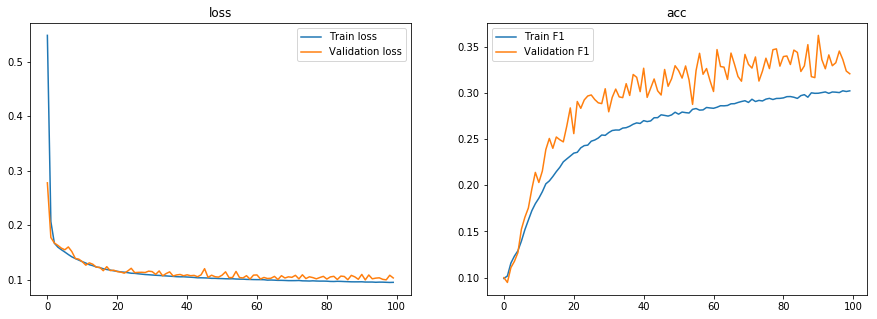

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(hist.epoch, hist.history["loss"], label="Train loss")
ax[0].plot(hist.epoch, hist.history["val_loss"], label="Validation loss")
ax[1].set_title('acc')
ax[1].plot(hist.epoch, hist.history["f1"], label="Train F1")
ax[1].plot(hist.epoch, hist.history["val_f1"], label="Validation F1")
ax[0].legend()
ax[1].legend()